<a href="https://colab.research.google.com/github/priyasi345/stu_marks_predictor/blob/master/stu_marks_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:

df=pd.read_csv('student_info.csv')

In [0]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [0]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


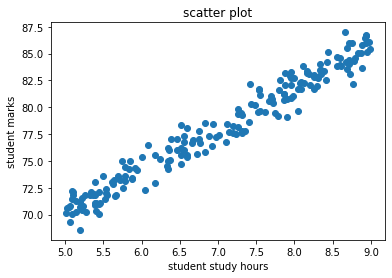

In [0]:
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel("student study hours")
plt.ylabel("student marks")
plt.title("scatter plot")
plt.show()

In [0]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [0]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [0]:
df2=df.fillna(df.mean())

In [0]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [0]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [0]:
#split dataset
x=df2.drop("student_marks",axis="columns")
y=df2.drop("study_hours",axis="columns")
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (200, 1)
shape of y (200, 1)


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)
print("x_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape) 

x_train (160, 1)
y_train (160, 1)
X_test (40, 1)
y_test (40, 1)


In [0]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [0]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lr.coef_

array([[3.93571802]])

In [0]:
lr.intercept_

array([50.44735504])

In [0]:
m=3.93
c=50.44
y=m * 4 + c
y

66.16

In [0]:
y_pred=lr.predict(X_test)

In [0]:
lr.predict([[4]])[0][0].round(2)

66.19

In [0]:
lr.predict(lr.predict(X_test))

array([[377.55989249],
       [360.98572484],
       [383.29114673],
       [388.24790714],
       [383.91074178],
       [368.26596671],
       [337.13131533],
       [332.48435244],
       [338.68030296],
       [332.48435244],
       [339.60969554],
       [351.07220401],
       [338.68030296],
       [340.07439183],
       [376.94029744],
       [327.52759202],
       [338.68030296],
       [360.36612979],
       [347.81932998],
       [375.8560061 ],
       [352.15649535],
       [327.83738955],
       [344.72135472],
       [357.36029944],
       [387.31851457],
       [375.39130981],
       [351.22710277],
       [385.14993188],
       [358.97204092],
       [370.74434692],
       [372.13843579],
       [377.71479126],
       [373.99722094],
       [369.66005558],
       [340.07439183],
       [330.47066852],
       [333.41374502],
       [371.36394197],
       [336.20192275],
       [333.56864378]])

In [0]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["study_hours","student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [0]:
lr.score(X_test,y_test)

0.9514124242154466

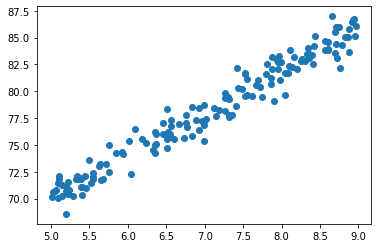

In [0]:
plt.scatter(X_train,y_train)

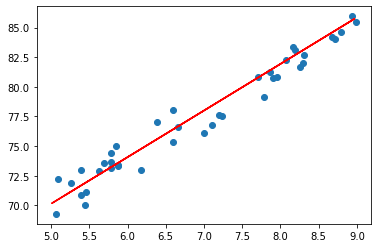

In [0]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color='r')

In [0]:
import joblib
joblib.dump(lr,"student_marks_predictor.pkl")

In [0]:
model=joblib.load("student_marks_predictor.pkl")

In [0]:
model.predict([[5]])

array([[70.12594512]])